# Project: Investigate a Dataset - TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I picked TMDb movies dataset for my product. This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, etc. It consists 10866 rows and 21 columns. 

### Questions
    1. Which year release most movies? 
    2. Which movie gain most profit, and which movie lose most?
    3. Which movie has highest budget, and which movie has least?
    4. Find top 10 most popular movies.
    5. Find the longest moive and the shortest moive.
    6. How does popularity depends on profit?
    7. Which genres are most popular from year to year?
    8. Top 10 production companies with high release.
    9. Dataset Analysis Based on Histogram.

In [207]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> In this session, I will load data and get an overrall sense about the size of the dataset. I will only keep those relevant data for analysis, and delete the un-used, null, duplicated, and zero values data so that they won't affect my analysis. 

### General Properties

In [208]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [209]:
df.shape

(10866, 21)

### Data Cleaning - Null Values, Duplicated Data, Extraneous Columns

1. Drop columns with null values and irrevelent data, such as 'imdb_id','homepage', 'tagline','keywords', 'overview','budget_adj','revenue_adj'.
2. Drop all duplicated data.
3. Replace those columns, such as budget, revenue and runtime, that contain zero values with 'null'.
4. Change release date data type from string to datetime.

In [210]:
#1 Unused, Null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [211]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [212]:
col=['imdb_id','homepage','keywords', 'tagline', 'overview','budget_adj',
    'revenue_adj']
df.drop(col,axis=1,inplace=True)

In [213]:
df.shape

(10866, 14)

In [214]:
#2 Duplicated
sum(df.duplicated())

1

In [215]:
df.drop_duplicates(inplace=True)

In [216]:
df.shape

(10865, 14)

In [217]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [218]:
na_columns=['cast','director','genres']
df.dropna(subset=na_columns, inplace=True)

In [219]:
df.isnull().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
runtime                   0
genres                    0
production_companies    959
release_date              0
vote_count                0
vote_average              0
release_year              0
dtype: int64

In [220]:
df.shape

(10731, 14)

In [221]:
#3 Zeros
df_budget=df.query('budget==0')
df_revenue=df.query('revenue==0')
df_runtime=df.query('runtime==0')

In [222]:
df_budget.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015


In [223]:
df_revenue.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
48,265208,2.93234,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015


In [224]:
df_runtime.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015


In [225]:
df_budget['budget'].value_counts()

0    5578
Name: budget, dtype: int64

In [226]:
df_revenue['revenue'].value_counts()

0    5888
Name: revenue, dtype: int64

In [227]:
df_runtime['runtime'].value_counts()

0    28
Name: runtime, dtype: int64

In [228]:
df['budget']=df['budget'].replace(0,np.nan)

In [229]:
df['revenue']=df['revenue'].replace(0,np.nan)

In [230]:
df['runtime']=df['runtime'].replace(0,np.nan)

In [231]:
# to check row 30 budget cell become null
df.head(35)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015
8,211672,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
runtime                 10703 non-null float64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.2+ MB


In [233]:
#drop all null values
df.dropna(inplace=True)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
id                      3805 non-null int64
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
dtypes: float64(5), int64(3), object(6)
memory usage: 445.9+ KB


In [235]:
#4 change release date data type
df['release_date']=pd.to_datetime(df['release_date'])

In [236]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [237]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Which year releases most movies?

Text(0,0.5,'Number of Movies')

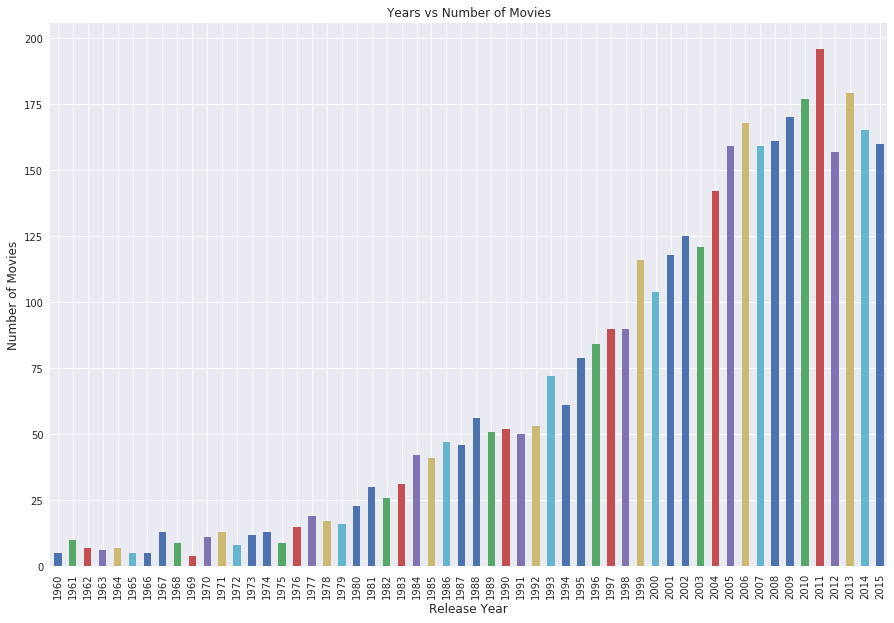

In [238]:
movie_year=df.groupby('release_year').count()['id']
movie_year.plot(kind='bar',figsize=(15,10))
plt.title('Years vs Number of Movies')
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Number of Movies',fontsize=12)

In [239]:
movie_year.max()

196

# Conclusion: 
2011 release 196 number of movies, which is the most.

### 2. Which movie gain most profit, and which movie lose most?

In [240]:
df['profit']=df['revenue']-df['budget']

In [241]:
def df_find(x):
    low_index=df[x].idxmin()
    high_index=df[x].idxmax()
    
    low=pd.DataFrame(df.loc[low_index,:])
    high=pd.DataFrame(df.loc[high_index,:])
    
    data=pd.concat([high,low],axis=1)
    
    return data
    
df_find('profit')

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


#### Conclusion:
 Highest profit: Avatar with $2.54 billions profit
 Lowest profit: The Warrior's Way, loss 413 millions.

### 3. Which movie has highest budget, and which movie has least?

In [242]:
df_find('budget')

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


#### Conclusion:
 Highest budget: The Warrior's Way has 425 millions budget.
 Lowest budget: Fear Clinic only has $1 budget.

### 4. Find top 10 most popular movies.

Text(0.5,0,'Popularity')

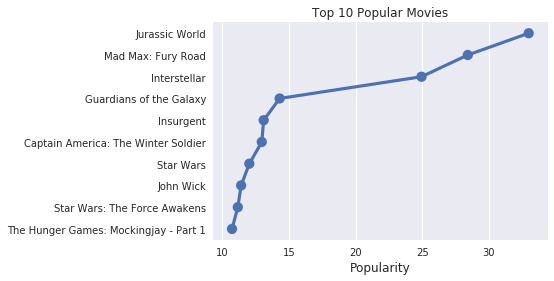

In [243]:
pop_movie=pd.DataFrame(df['popularity'].sort_values(ascending=False))
pop_movie['original_title']=df['original_title']
info_movie=list(map(str,(pop_movie['original_title'])))
x=list(info_movie[:10])
y=list(pop_movie['popularity'][:10])

ax = sns.pointplot(x=y,y=x)

sns.set(rc={'figure.figsize':(15,10)})

ax.set_title("Top 10 Popular Movies",fontsize = 12)
ax.set_xlabel("Popularity",fontsize = 12)

#### Conclusion:
Jurassic World was the most popular movie among the years.

### 5. Find longest moive and shortest moive.

In [244]:
df_find('runtime')

,2107,5162
id,43434,24914
popularity,0.534192,0.208637
budget,1.8e+07,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C


#### Conclusion:
 Carlos was the longest movie. It has 338 mins.
 Kid's Story was the shortest. It only has 15 mins.

### 6. How does popularity depends on profit?

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.5948676576773305

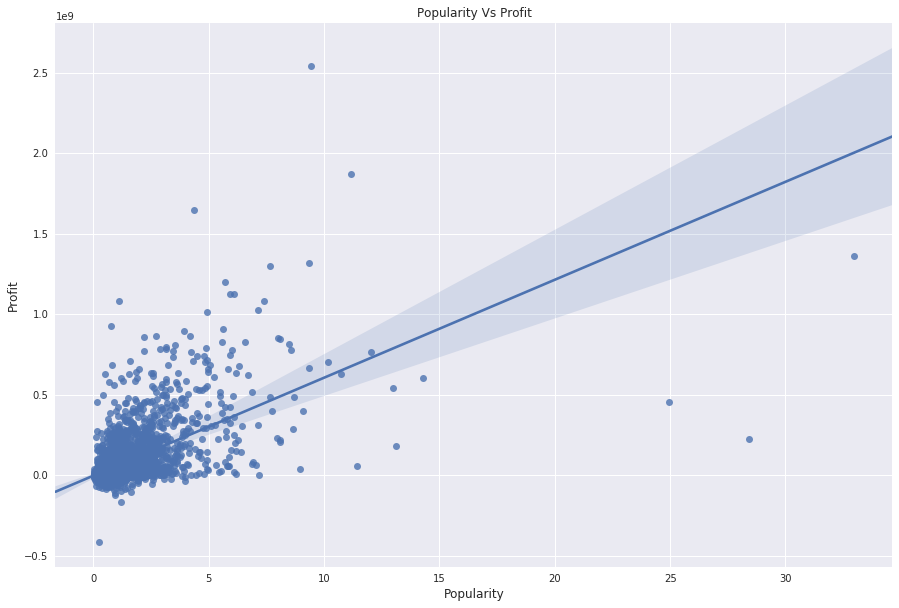

In [254]:
ax = sns.regplot(x=df['popularity'],y=df['profit'])

ax.set_title('Popularity Vs Profit',fontsize=12)
ax.set_xlabel('Popularity',fontsize=12)
ax.set_ylabel('Profit',fontsize=12)

sns.set(rc={'figure.figsize':(15,10)})

df.corr().loc['popularity','profit']

#### Conclusion:
 Popularity and profit has a positive correlation (0.595), which indicates movies with high popularity tend to produce more profit.

###  7. Which genres are most popular from year to year?

In [246]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03
mean,40040.372668,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,7.136540e+07
std,67585.708616,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,1.513764e+08
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,-4.139124e+08
25%,5925.000000,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,-1.173477e+06
50%,11253.000000,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,2.047434e+07
75%,38579.000000,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,8.347333e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,2.544506e+09


In [247]:
# From last question, since popularity and profit has a positive correlation. 
# Therefore, we select the movies having profit $70.5M or more, which can also represent the entire dataset on popularity.
profit_info = df[df['profit'] >= 70500000]

profit_info.index = range(len(profit_info))

profit_info.index = profit_info.index + 1

profit_info.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
1,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
2,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08


In [248]:
def gen_cat(column):
    gen_cat = profit_info[column].str.cat(sep = '|')
    
    gen_cat = pd.Series(gen_cat.split('|'))
    
    count = gen_cat.value_counts(ascending = False)
    
    return count

In [249]:
count = gen_cat('genres')

count.head()

Comedy       386
Action       385
Drama        368
Adventure    321
Thriller     312
dtype: int64

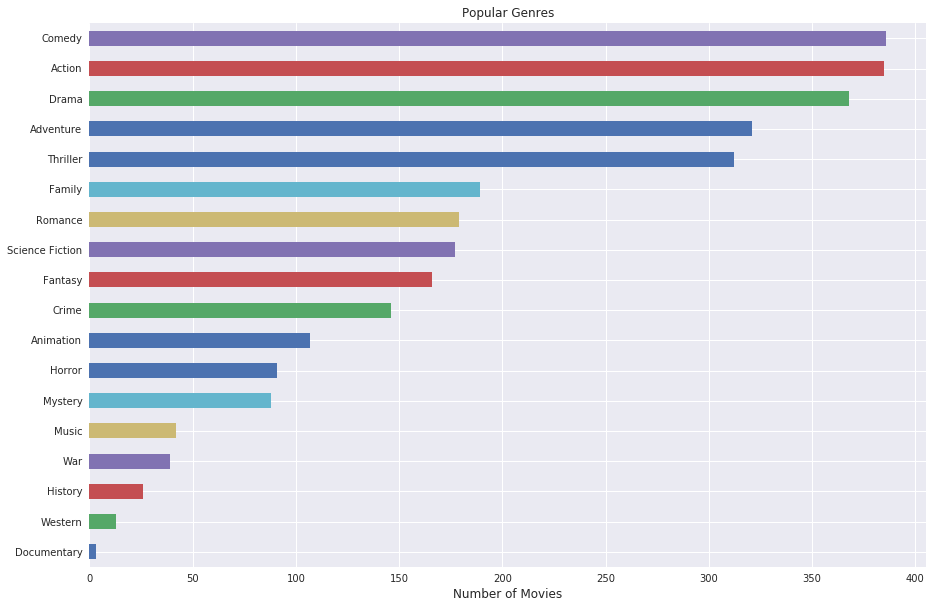

In [250]:
count.sort_values(ascending = True, inplace = True)

gen=count.plot(kind= 'barh',figsize=(15, 10))

gen.set(title = 'Popular Genres')

gen.set_xlabel('Number of Movies', fontsize = '12')

plt.show()


#### Conclusion:
There are total 386 comedy had been released. Comedy is the most popular genres. 

###  8. Top 10 production companies with high release.

Text(0.5,0,'Number Of Movies')

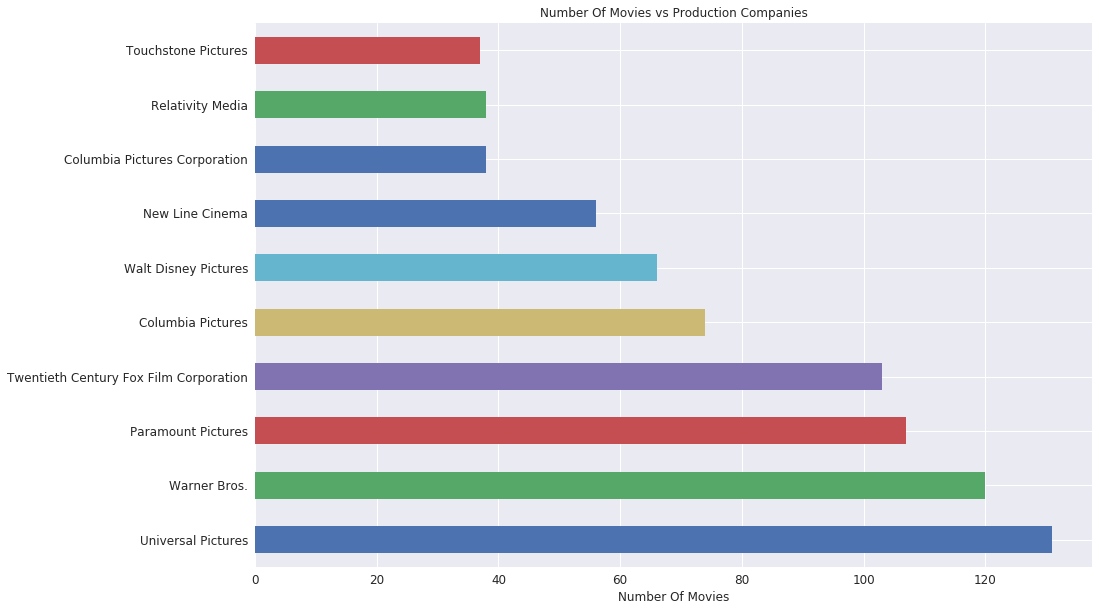

In [251]:
pro_comp=gen_cat('production_companies')

pro_comp.iloc[:10].plot(kind='barh',figsize=(15,10),fontsize=12)
plt.title("Number Of Movies vs Production Companies",fontsize=12)
plt.xlabel('Number Of Movies',fontsize=12)

### 9. Dataset Analysis Based on Histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6690e7d320>,
      dtype=object)

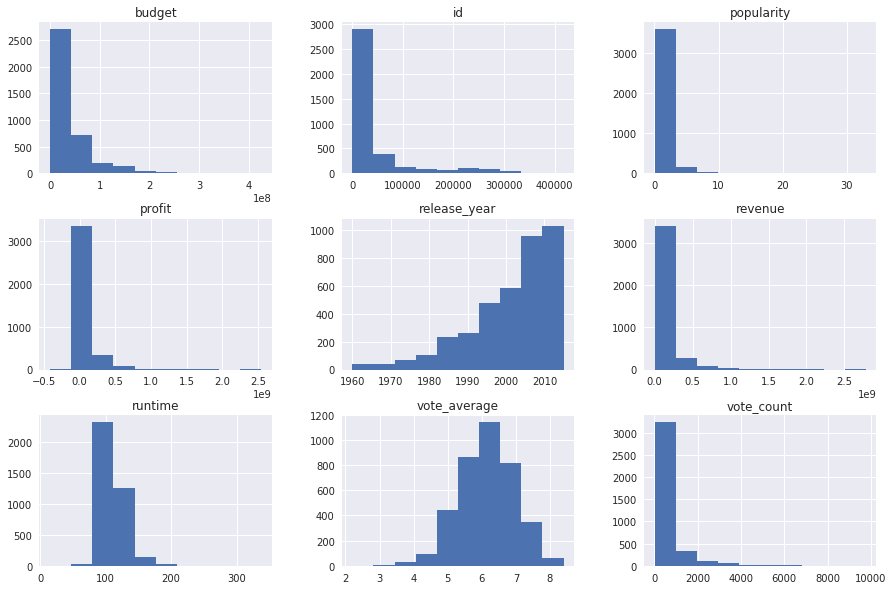

In [252]:
df.hist()

#### Conclusion:
The market starts to produce more movies after 2000.
Majority movies have a runtime around 100 mins.
Average vote is around 6.2.

#### Conclusion:
Universal Pictures releases most movies.

<a id='conclusions'></a>
## Conclusions

1. 2011 release 196 number of movies, which is the most.
2. Avatar gain 2.54 billions profit, which is the highest. The Warrior's Way loss 413 millions.
3. The Warrior's Way has 425 millions budget, which is the most. Fear Clinic only has 1 budget.
4. Jurassic World was the most popular movie among the years.
5. Carlos was the longest movie. It has 338 mins. Kid's Story was the shortest. It only has 15 mins.
6. Popularity and profit has a positive correlation (0.595), which indicates movies with high popularity tend to produce more profit.
7. There are total 386 comedy had been released over the years. Comedy is the most popular genres.
8. Universal Pictures releases most movies.
9. The market starts to produce more movies after 2000. Majority movies have a runtime around 100 mins. Average vote is around 6.2.

### Limitations
1. During the data cleaning process, there are large amount of zero values in the budget and revenue columns. I choose to drop them. This might affect the final results. However, if keep those zero values and null values in the data, it will lead to wrong predications or biased analysis.
2. The entire dataset does not have units in it. It might be possible different moives have budget,revenue and profit in different currency; different movies have runtime in minutes or hours, etc. This could be lead to a big issue in the analysis.

In [255]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0